In [1]:
%matplotlib notebook
import matplotlib
import seaborn as sb
from matplotlib import pyplot as plt
import numpy as np

# Jupyter Specifics
%matplotlib inline
from IPython.display import display, HTML
from ipywidgets.widgets import interact, interactive, IntSlider, FloatSlider, Layout, ToggleButton, ToggleButtons, fixed
display(HTML("<style>.container { width:100% !important; }</style>"))
style = {'description_width': '100px'}
slider_layout = Layout(width='99%')

In [2]:
from Cluster import *

Getting data:
getting JHU data...
number of countries listed 274
done with JHU data.  Got  274 countries.
getting owid data...
data for population changes only slowly if at all in OWID database
done with owid data. Got 212 countries
WHO acute file found dictionary acute_who
ICU file found dictionary icus_2012
---------------------------------
Done with data.
---------------------------------
Getting deaths, case and testing data...
done.
doing piecwise linear fits to testing data ...
done.
making cases with nonlinear testing adjustment...
done.
to change the nonlinear correction function, call make_cases_adj_nonlin(K), K=2 by default


In [3]:
datasets = ['deaths','cases','cases_lin2020','cases_pwlfit','cases_nonlin']

d_countries = [c for c in clusdata_all['deaths']]
c_countries = [c for c in clusdata_all['cases']]
lc_countries = [c for c in clusdata_all['cases_lin2020']]
pc_countries = [c for c in clusdata_all['cases_pwlfit']]
nc_countries = [c for c in clusdata_all['cases_nonlin']]

countries = d_countries

In [4]:
# check that all country sets being used are the same and check time series lengths and starting dates
countrysets = [d_countries,c_countries,lc_countries,pc_countries,nc_countries]
print([len(ccs) for ccs in countrysets])
for ccs1 in countrysets:
    print([ccs1 == ccs2 for ccs2 in countrysets])
print([len(clusdata_all[d1]['United States']) for d1 in datasets])
print(len(total_deaths_x['dates']),len(total_cases_x['dates']),len(testing_x['dates']),total_deaths_x['dates'][0],total_cases_x['dates'][0],testing_x['dates'][0])

[59, 59, 59, 59, 59]
[True, True, True, True, True]
[True, True, True, True, True]
[True, True, True, True, True]
[True, True, True, True, True]
[True, True, True, True, True]
[165, 165, 165, 165, 165]
267 267 267 12/31/19 12/31/19 12/31/19


In [5]:
len(testing_x['dates'])

267

# ClusterFit testing

In [ ]:
np.argsort(list(range(4,14)))[-1:][0]

16000 2 seats

In [ ]:

base = '../../covid-19-JH/csse_covid_19_data/csse_covid_19_time_series/'
confirmed_jhu = get_data(base+'time_series_covid19_confirmed_global.csv')
deaths_jhu = get_data(base+'time_series_covid19_deaths_global.csv')

In [ ]:
[x for x in dir() if 'death' in x]

In [ ]:
plt.plot(new_cases_spm['Denmark'])

In [ ]:

plt.plot(confirmed_jhu[('Germany','')])

## cases

In [ ]:
len(clusdata_all['cases'])

In [ ]:
#foo = ClusterFit(clusdata_all['cases'],fft='fft') # real and imag components of FFT used together for PCA
#foo = ClusterFit(clusdata_all['cases'],fft='powfft') # power spectrum via FFT used for PCA (not invertible)
foo = ClusterFit(clusdata_all['cases'],fft=None) 

In [ ]:
foo.umap_cluster(5,5,n_neighbors=6)
print('mean cluster membership probability =',np.mean(foo.clus_probs))
foo.plot_umap()

In [ ]:
foo.clus_labels
print(len(foo.clus_labels))
print(len(c_countries))

In [ ]:
foo.clus_labels

In [ ]:
labelled = [(foo.clus_labels[i],c_countries[i]) for i in range(len(foo.clus_labels))]
print(labelled)

In [ ]:
np.lexsort((c_countries,foo.clus_labels))

In [ ]:
# foo.umap_best_cluster(Nclus=3)
foo.umap_best_cluster(Nclus=4,n_neighbors=6)

In [ ]:
foo.plot_umap()

In [ ]:
np.mean(foo.clus_probs)

In [ ]:
foo.clus_labels

In [ ]:
foo.cluster_plot_all()

In [ ]:
foo.plot_pcas()

In [ ]:
clsize = []
clprobs = []
for i in range(100):
    foo.umap_cluster(i,min_size=5,diag=False)
    clsize.append(len(set(foo.clus_labels)))
    clprobs.append(np.mean(foo.clus_probs))

In [ ]:
plt.scatter(clsize,clprobs)
plt.title('min_size=5');

In [ ]:
# min_size = 6
plt.scatter(clsize,clprobs)

In [ ]:
plt.hist(clsize);
plt.show()
plt.hist(clprobs);

In [ ]:
plt.hist(clsize);
plt.show()
plt.hist(clprobs);

In [ ]:
plt.hist(clsize);

In [ ]:
plt.hist(clprobs);

In [ ]:
clusfit_all = {}
clusfit_all['cases'] = foo

## cases FFT

In [ ]:
len(clusdata_all['cases'])

In [ ]:
foofft = ClusterFit(clusdata_all['cases'],fft='fft') # real and imag components of FFT used together for PCA
#foo = ClusterFit(clusdata_all['cases'],fft='powfft') # power spectrum via FFT used for PCA (not invertible)
#foo = ClusterFit(clusdata_all['cases'],fft=None) 

In [ ]:
foofft.umap_cluster(5,5)
print('mean cluster membership probability =',np.mean(foofft.clus_probs))
foofft.plot_umap()

In [ ]:
# foo.umap_best_cluster(Nclus=3)
foofft.umap_best_cluster()

In [ ]:
foofft.plot_umap()

In [ ]:
np.mean(foofft.clus_probs)

In [ ]:
foofft.clus_labels

In [ ]:
foofft.cluster_plot_all()

In [ ]:
foofft.plot_pcas()

In [ ]:
clsize = []
clprobs = []
for i in range(100):
    foofft.umap_cluster(i,min_size=5,diag=False)
    clsize.append(len(set(foofft.clus_labels)))
    clprobs.append(np.mean(foofft.clus_probs))

In [ ]:
plt.scatter(clsize,clprobs)
plt.title('min_size=5');

In [ ]:
# min_size = 6
plt.scatter(clsize,clprobs)

In [ ]:
plt.hist(clsize);
plt.show()
plt.hist(clprobs);

In [ ]:
plt.hist(clsize);
plt.show()
plt.hist(clprobs);

In [ ]:
plt.hist(clsize);

In [ ]:
plt.hist(clprobs);

In [ ]:
clusfit_all = {}
clusfit_all['cases'] = foofft

## deaths

In [ ]:
len(clusdata_all['deaths'])

In [ ]:
foo = ClusterFit(clusdata_all['deaths']) # real and imag components of FFT used together for PCA
#foo = ClusterFit(clusdata_all['deaths'],fft='powfft') # power spectrum via FFT used for PCA (not invertible)
#foo = ClusterFit(clusdata_all['deaths'],fft=None) 

In [ ]:
foo.umap_cluster(5,5)
print('mean cluster membership probability =',np.mean(foofft.clus_probs))
foo.plot_umap()

In [ ]:
# foo.umap_best_cluster(Nclus=3)
foo.umap_best_cluster(Nclus=3)

In [ ]:
foo.plot_umap()

In [ ]:
np.mean(foo.clus_probs)

In [ ]:
foo.cluster_plot_all()

In [ ]:
foo.plot_pcas()

In [ ]:
clsize = []
clprobs = []
for i in range(100):
    foo.umap_cluster(i,min_size=5,diag=False)
    clsize.append(len(set(foo.clus_labels)))
    clprobs.append(np.mean(foo.clus_probs))

In [ ]:
plt.scatter(clsize,clprobs)
plt.title('min_size=5');

In [ ]:
# min_size = 6
plt.scatter(clsize,clprobs)

In [ ]:
plt.hist(clsize);
plt.show()
plt.hist(clprobs);

In [ ]:
plt.hist(clsize);
plt.show()
plt.hist(clprobs);

In [ ]:
plt.hist(clsize);

In [ ]:
plt.hist(clprobs);

In [ ]:
clusfit_all = {}
clusfit_all['cases'] = foo

## deaths FFT

In [ ]:
foofft = ClusterFit(clusdata_all['deaths'],fft='fft')

In [ ]:
foofft.umap_cluster(3) # arg = random seed

In [ ]:
foofft.plot_umap()

In [ ]:
foofft.umap_best_cluster()

In [ ]:
foofft.plot_umap()

In [ ]:
foofft.plot_pcas()

In [ ]:
clusfit_all['deaths'] = foofft

# Plots of all countries

In [ ]:
plot_all(countries,clusdata_all['deaths'])

In [ ]:
plot_all(countries,clusdata_all['cases'],clusdata_all['cases_nonlin'],longshort_testing_c)

In [ ]:
plot_all(countries,clusdata_all['cases'],clusdata_all['cases_nonlinr'],longshort_reg_testing_c)

In [ ]:
plot_all(countries,clusdata_all['cases'],clusdata_all['cases_pwlfit'],longshort_reg_testing_c)

In [ ]:
plot_all(lcountries,cases_raw,cases_adj_lin2020)

# Compare best clusters

In [ ]:
datasets = [c for c in clusdata_all]
datasets

In [ ]:
len(countries)

In [ ]:
plot_all(countries,clusdata_all['cases'],clusdata_all['cases_nonlinr']);

In [ ]:
#  Norman not sure I understand what you are printing out with "found 48 clusters of size 3" , seems wrong
res = {}
for d in datasets:
    print('doing ',d,'...')
    mfit = ClusterFit(clusdata_all[d])
    mfit.umap_best_cluster()
    res[d] = mfit

In [ ]:
for rr in res:
    foo = res[rr]
    # foo.plot_umap() ########## doesn't work???
    plt.scatter(foo.um_dat[0],foo.um_dat[1],c=foo.clus_labels)
    plt.title(rr)
    plt.show()

In [ ]:
def corcl(a,b):
    if len(set(a)) > 0 or len(set(b)) > 0:
        return len(set(a).intersection(set(b)))/float(len(set(a).union(set(b))))
    else:
        return 1 
    
def matchset(a,x):
    rtn = [i for i in range(len(a)) if a[i] == x]
    return rtn

def match1(a,x):
    rtn = [1 for i in range(len(a)) if a[i] == x]
    return rtn
    
def imxcor(clusters,nset,n,nclus,nclusmax=6): 
    """ finds cluster index in previous datasets d best correlated to cluster n in dataset dd
        nclus is current number of already aligned clusters
        nclusmax is max allowed number of clusters
    """
    cx = []
    cc = clusters[nset]
    for j in range(0,nset):
        c = mapclusters[j]
        klen = min(nclusmax,len(cc))
        for k in range(nclus): # find best matching previous cluster
            cx.append(np.sum(match1(cc,n)*match1(c,k)))
    return argmax(cx),max(cx)

In [ ]:
maxclusters = 6
clusters = [res[d].clus_labels for d in res]
ncountries = len(res['deaths'])
mapclusters = np.zeros((len(clusters),ncountries)
mapclusters[0,:] = clusters[0,:] # class lables are those of deaths to start, may be expanded
corclasses = np.zeros((len(classes),len(classes)))
c = clusters[0] # the first dataset clusters are all accepted as first clusters
nclusters = len(set(c))                    
for j in range(1,len(clusters)):
    cc = clusters[j] # clus_labels for jth dataset
                      # map clusters to best matching cluster in 0th dataset : losers try with other previous datasets : losers new
    for k in set(cc):
                       i,cor = imxcor(k,cc,nclusmax=nclasses)
                       
    corclasses[i,j] = mxcor(c,cc)
    corclasses[j,i] = corclasses[i,j]
for i in range(len(classes)):
    corclasses[i,i] = 1.0
plt.imshow(corclasses)    

In [ ]:
print([(i,c,np.mean(corclasses[i,:])) for i,c in enumerate([r for r in res])])

In [ ]:
for i in range(6):
    plt.plot(list(range(6)),corclasses[i,:])

Note: `cases_nonlin` and `cases_nonlinr` currently same.

**Cluster correlations not outstandingly high!**

In [ ]:
foo = res['cases_nonlin']

In [ ]:
def plot_adj(country, data, adj = None, testing=None,  ndays=250, axis = None):
    ndays = 250
    if testing:
        # Ntests = regtests(testing,country)  # this does not work here, since data is already synchronized, use regularized data in testing 
        Ntests = testing[country]
    if axis is None:   
        fig, ax1 = plt.subplots(figsize=(12,8))
    else:
        ax1 = axis
    ax1.plot(data[country][:ndays]) 
    if adj is not None:  # already adjusted
        ax1.plot(adj[country][:ndays])
    ax1.set_title(country)
    ax1.set_ylabel('Cases/million')
    ax1.set_xlabel('day')
    if testing:
        ax2 = ax1.twinx()
        ax2.plot(Ntests[:ndays],color='red',alpha=0.4)
        ax2.set_ylabel('Testing/1000')

        
def plot_all(countries,dat,adj=None,testing=None,ndays=250):
    max_cols=6
    max_rows=int(len(countries)/max_cols) + 1
    fig, axes = plt.subplots(nrows=max_rows, ncols=max_cols, figsize=(24,4*max_rows))

    for idx, country  in enumerate(countries):
        row = idx // max_cols
        col = idx % max_cols
        plot_adj(country,dat,adj,testing,ndays,axis=axes[row,col])
    for idx in range(len(countries),max_rows*max_cols):
        row = idx // max_cols
        col = idx % max_cols
        axes[row, col].axis("off")
    #plt.subplots_adjust(wspace=.05, hspace=.05)
    fig.tight_layout()
    #for ax in fig.get_axes():
    #    ax.label_outer()
    plt.show()


In [ ]:
plt.plot(foo.smoothed[0])

In [ ]:
len(foo.dat[0,:])

In [ ]:
dat1 = {countries[i]:foo.dat[i,:] for i in range(len(countries))}
dat2 = {countries[i]:foo.smoothed[i,:] for i in range(len(countries))}
plot_all(countries,dat1,dat2)

In [ ]:
cc = 'cases_nonlin'
clus0 = [i for i,x in enumerate(res[cc].clus_labels) if x==0]

count0 = [countries[i] for i in clus0]
plot_all(count0,dat1,dat2)

In [ ]:
cc = 'cases_nonlin'
clus = [i for i,x in enumerate(res[cc].clus_labels) if x==1]

count = [countries[i] for i in clus]
plot_all(count,dat1,dat2)

In [ ]:
cc = 'cases_nonlin'
clus = [i for i,x in enumerate(res[cc].clus_labels) if x==2]

count = [countries[i] for i in clus]
plot_all(count,dat1,dat2)

# Hdbscan on raw data

In [ ]:
foo = list(range(10))
foo[3]='red'
foo

In [ ]:
foodeath = ClusterFit(clusdata_all['deaths'])


In [ ]:
foodeath.hdbscan()

In [ ]:
foodeath.umap(n_neighbors=4)

In [ ]:
len(foodeath.clus_labels)

In [ ]:
foodeath.clus_labels

In [ ]:
foodeath.plot_umap()

# hdbscan on raw PCA

In [ ]:
foodeath = ClusterFit(clusdata_all['deaths'])


In [ ]:
foodeath.hdbscan_pca()

In [ ]:
foodeath.umap(n_neighbors=4)

In [ ]:
len(foodeath.clus_labels)

In [ ]:
foodeath.clus_labels

In [ ]:
foodeath.plot_umap()

# FPCA

[Example](https://fda.readthedocs.io/en/latest/auto_examples/plot_fpca.html#sphx-glr-auto-examples-plot-fpca-py) of FPCA...

Also: see same example in the fpca_example notebook.

Also:  see [documentation](https://fda.readthedocs.io/en/latest/modules/preprocessing/dim_reduction/autosummary/skfda.preprocessing.dim_reduction.projection.FPCA.html?highlight=fpca) for FPCA.

## Using raw data (as discrete samples)

### Preliminary scratch...

In [ ]:
dat = foodeath.dat

In [ ]:
foodeath.fitted.shape

In [ ]:
dat.shape

In [7]:
import skfda
from skfda.datasets import fetch_growth
from skfda.exploratory.visualization import plot_fpca_perturbation_graphs
from skfda.preprocessing.dim_reduction.projection import FPCA
from skfda.representation.basis import BSpline, Fourier, Monomial



In [ ]:
len(dat[0])

Configure data a samples of a function on a grid, specify the grid as list of days:

In [ ]:
dat_disc = skfda.representation.grid.FDataGrid(dat,list(range(len(dat[0]))))

In [ ]:
len(dat_disc)

In [ ]:
dat_disc.plot()

In [ ]:
idx = [i for i,x in enumerate(countries) if x=="Spain"][0]
dat_disc[idx].plot()
plt.title(countries[idx])

In [ ]:
fpca_disc = FPCA(n_components=10)
fpca_disc.fit(dat_disc)
fpca_disc.components_.plot()


In [ ]:
max_cols = 5
max_rows = len(fpca_disc.components_) // max_cols
#fig, axes = plt.subplots(nrows=max_rows, ncols=max_cols, figsize=(20,max_rows*3.5))
for i in range(len(fpca_disc.components_)):
    row = i // max_cols
    col = i % max_cols
    #axes[row, col].axis("off")
    fpca_disc.components_[i].plot()


In [ ]:
foo = fpca_disc.transform(dat_disc)

In [ ]:
[x for x in dir(fpca_disc) if 'transform' in x]

In [ ]:
type(foo)

In [ ]:
foo.shape

In [ ]:
foo.shape

In [ ]:
for minc in range(2,8):
    for ncomp in range(5,11):
        fpca_disc = FPCA(n_components=ncomp)
        fpca_disc.fit(dat_disc)
        foo = fpca_disc.transform(dat_disc)
        clusterer = hdbscan.HDBSCAN(min_cluster_size=minc)
        labels = clusterer.fit_predict(foo)
        try:
            validity = hdbscan.validity.validity_index(foo, labels)
            print('hdbscan_min_clus=',minc,':  ',ncomp ,'FPCAcomponents:  ',
                  len(set([x for x in labels if x>-1])),'clusters;  ',
                  sum([1 for x in labels if x>-1]),'clustered;  ',sum([1 for x in labels if x==-1]),'unclustered; ','validity =',np.round(validity,3))
        except:
            validity=None

            print('hdbscan_min_clus=',minc,':  ',ncomp ,'FPCAcomponents:  ',
              len(set([x for x in labels if x>-1])),'clusters;  ',
              sum([1 for x in labels if x>-1]),'clustered;  ',sum([1 for x in labels if x==-1]),'unclustered; ','validity =',validity)
        #print(labels)

    print('--------------------------')

In [ ]:
min_samples = 3
for minc in range(2,8):
    for ncomp in range(3,11):
        fpca_disc = FPCA(n_components=ncomp)
        fpca_disc.fit(dat_disc)
        foo = fpca_disc.transform(dat_disc)
        clusterer = hdbscan.HDBSCAN(min_cluster_size=minc,min_samples=min_samples)
        labels = clusterer.fit_predict(foo)
        try:
            validity = hdbscan.validity.validity_index(foo, labels)
            print('hdbscan_min_clus=',minc,':  ',ncomp ,'FPCAcomponents:  ',
                  len(set([x for x in labels if x>-1])),'clusters;  ',
                  sum([1 for x in labels if x>-1]),'clustered;  ',sum([1 for x in labels if x==-1]),'unclustered; ','validity =',np.round(validity,3))
        except:
            validity=None

            print('hdbscan_min_clus=',minc,':  ',ncomp ,'FPCAcomponents:  ',
              len(set([x for x in labels if x>-1])),'clusters;  ',
              sum([1 for x in labels if x>-1]),'clustered;  ',sum([1 for x in labels if x==-1]),'unclustered; ','validity =',validity)
        #print(labels)

    print('--------------------------')

In [ ]:
labels

### integrated into ClusterFit

In [ ]:
foo = ClusterFit(clusdata_all['deaths'])

In [ ]:
foo.hdbscan_fpca()

In [ ]:
foo.umap()
foo.plot_umap()

### Cases

In [ ]:
foocases = ClusterFit(clusdata_all['cases'])
dat = foocases.dat
dat_disc = skfda.representation.grid.FDataGrid(dat,list(range(len(dat[0]))))
foo = fpca_disc.transform(dat_disc)

In [ ]:
min_samples = 4
for minc in range(2,8):
    for ncomp in range(3,11):
        fpca_disc = FPCA(n_components=ncomp)
        fpca_disc.fit(dat_disc)
        foo = fpca_disc.transform(dat_disc)
        clusterer = hdbscan.HDBSCAN(min_cluster_size=minc,min_samples=min_samples)
        labels = clusterer.fit_predict(foo)
        try:
            validity = hdbscan.validity.validity_index(foo, labels)
            print('hdbscan_min_clus=',minc,':  ',ncomp ,'FPCAcomponents:  ',
                  len(set([x for x in labels if x>-1])),'clusters;  ',
                  sum([1 for x in labels if x>-1]),'clustered;  ',sum([1 for x in labels if x==-1]),'unclustered; ','validity =',np.round(validity,3))
        except:
            validity=None

            print('hdbscan_min_clus=',minc,':  ',ncomp ,'FPCAcomponents:  ',
              len(set([x for x in labels if x>-1])),'clusters;  ',
              sum([1 for x in labels if x>-1]),'clustered;  ',sum([1 for x in labels if x==-1]),'unclustered; ','validity =',validity)
        #print(labels)

    print('--------------------------')

### Cases adj_nonlin

In [ ]:
cases = [c for c in clusdata_all]
cases

In [13]:
foocases_nonlin = ClusterFit(clusdata_all['cases_nonlin'])
dat = foocases_nonlin.dat
dat_disc = skfda.representation.grid.FDataGrid(dat,list(range(len(dat[0]))))
foo = fpca_disc.transform(dat_disc)

In [14]:
min_samples = 3
for minc in range(2,8):
    for ncomp in range(3,16):
        fpca_disc = FPCA(n_components=ncomp)
        fpca_disc.fit(dat_disc)
        foo = fpca_disc.transform(dat_disc)
        clusterer = hdbscan.HDBSCAN(min_cluster_size=minc,min_samples=min_samples,gen_min_span_tree=True)
        labels = clusterer.fit_predict(foo)
        try:
            validity = hdbscan.validity.validity_index(foo, labels)
            print('hdbscan_min_clus=',minc,':  ',ncomp ,'FPCAcomponents:  ',
                  len(set([x for x in labels if x>-1])),'clusters;  ',
                  sum([1 for x in labels if x>-1]),'clustered;  ',sum([1 for x in labels if x==-1]),'unclustered; ','validity =',np.round(validity,5))
        except:
            validity=None

            print('hdbscan_min_clus=',minc,':  ',ncomp ,'FPCAcomponents:  ',
              len(set([x for x in labels if x>-1])),'clusters;  ',
              sum([1 for x in labels if x>-1]),'clustered;  ',sum([1 for x in labels if x==-1]),'unclustered; ','validity =',validity)
        #print(labels)

    print('--------------------------')

hdbscan_min_clus= 2 :   3 FPCAcomponents:   4 clusters;   45 clustered;   14 unclustered;  validity = 0.49264
hdbscan_min_clus= 2 :   4 FPCAcomponents:   5 clusters;   43 clustered;   16 unclustered;  validity = None
hdbscan_min_clus= 2 :   5 FPCAcomponents:   4 clusters;   44 clustered;   15 unclustered;  validity = 0.42067
hdbscan_min_clus= 2 :   6 FPCAcomponents:   4 clusters;   40 clustered;   19 unclustered;  validity = 0.37563
hdbscan_min_clus= 2 :   7 FPCAcomponents:   6 clusters;   38 clustered;   21 unclustered;  validity = None
hdbscan_min_clus= 2 :   8 FPCAcomponents:   5 clusters;   35 clustered;   24 unclustered;  validity = None
hdbscan_min_clus= 2 :   9 FPCAcomponents:   5 clusters;   35 clustered;   24 unclustered;  validity = None
hdbscan_min_clus= 2 :   10 FPCAcomponents:   4 clusters;   39 clustered;   20 unclustered;  validity = None
hdbscan_min_clus= 2 :   11 FPCAcomponents:   5 clusters;   40 clustered;   19 unclustered;  validity = None
hdbscan_min_clus= 2 :   12

### Conclusions

* N_components = 5 seems to be swee spot (high validity, with 6 unclustered)
* N_components = 4 can have higher validity, but 12 unclustered
* Note min_cluster_size doesn't seem to make a bit difference in the validity profile, once > 3
* Validity same for 5 decimal places probably means clustering is identical.

**Suggested 'canonical' hyperparams:**
* hdbscan min_samples = 3
* hdbscan min_cluster_size = 3
* FPCA N_components = 5



### Scan with 3 scorings to compute best cluster, saving results for comparison

In [237]:
maxvalid = []
maxvalidval= 0.0
minscore1 = []
minscore1val = 999.
minscore2 = []
minscore2val = 999.
print('---------------------------------------------------------')
probdata=np.zeros((7*11,len(dat)),dtype=float)
clusdata = np.zeros((7*11,len(countries)),dtype=np.integer)
report = []
count = 0
for minc in range(3,10):
    min_samples = 2
    for ncomp in [3,4,5,6,7,8,9,10,11,12,15]:
        fpca_disc = FPCA(n_components=ncomp)
        fpca_disc.fit(dat_disc)
        foo = fpca_disc.transform(dat_disc)
        clusterer = hdbscan.HDBSCAN(min_cluster_size=minc,min_samples=min_samples,cluster_selection_epsilon=0)
        labels = clusterer.fit_predict(foo)
        nclus = len(set([x for x in labels if x>-1]))
        nclustered = sum([1 for x in labels if x>-1])
        nunclustered = sum([1 for x in labels if x==-1])
        
        try:
            validity = hdbscan.validity.validity_index(foo, labels)
            score1 = 1.0/validity + nunclustered/5 + np.abs(nclus-4)/2
            score2 = unclus*(4.+np.abs(nclus-4))/(validity*20)
            if validity > maxvalidval:
                maxvalidval = validity
                maxvalid = [(minc,min_samples,ncomp,nclus,nclustered,nunclustered,validity,score1,score2)]
            elif validity == maxvalidval:
                maxvalid.append(minc,min_samples,ncomp,nclus,nclustered,nunclustered,validity,score1,score2)
            if score1 <  minscore1val:
                minscore1val = score1
                minscore1 = [(minc,min_samples,ncomp,nclus,nclustered,nunclustered,validity,score1,score2)]
            elif score1 ==  minscore1val:
                minscore1.append(minc,min_samples,ncomp,nclus,nclustered,nunclustered,validity,score1,score2)   
            if score2 <  minscore2val:
                minscore2val = score2
                minscore2 = [(minc,min_samples,ncomp,nclus,nclustered,nunclustered,validity,score1,score2)]
            elif score2 ==  minscore2val:
                minscore2.append(minc,min_samples,ncomp,nclus,nclustered,nunclustered,validity,score1,score2) 
            print('hdbscan: ',minc,'minc:  ',min_samples,'mins:  ',ncomp ,'FPCAcomponents:  ',
                  nclus,'clusters;  ',
                  nclustered,'clustered;  ',
                  nunclustered,'unclustered; ','validity =',np.round(validity,5),
                  'score1:',np.round(score1,3),'score2:',np.round(score2,3))
            probdata[count,:] = clusterer.probabilities_[:]
            clusdata[count,:] = labels[:]
            report.append('hdbscan: %2d,%3d,%3d,%3d,%5.2f' % (minc,ncomp,nclus,nunclustered,validity))
            
        except:
            validity=None
            print('hdbscan: ',minc,'minc:  ',min_samples,'mins:  ',ncomp ,'FPCAcomponents:  ',
              nclus,'clusters;  ',
              nclustered,'clustered;  ',nunclustered,'unclustered; ','validity =',validity,)
            report.append('hdbscan: %2d,%3d,%3d,%3d,%5.2f' % (minc,ncomp,nclus,nunclustered,0.))
        count = count+1
    print('--------------------------')
print('---------------------------------------------------------')
print('minc,min_samples,ncomp,nclus,nclustered,nunclustered,validity,score1,score2')
print('maxvalid ',maxvalid)
print('minscore1',minscore1)
print('minscore2',minscore2)

---------------------------------------------------------
hdbscan:  3 minc:   2 mins:   3 FPCAcomponents:   4 clusters;   52 clustered;   7 unclustered;  validity = 0.468 score1: 3.537 score2: 4.274
hdbscan:  3 minc:   2 mins:   4 FPCAcomponents:   4 clusters;   48 clustered;   11 unclustered;  validity = 0.44951 score1: 4.425 score2: 4.449
hdbscan:  3 minc:   2 mins:   5 FPCAcomponents:   5 clusters;   42 clustered;   17 unclustered;  validity = 0.34693 score1: 6.782 score2: 7.206
hdbscan:  3 minc:   2 mins:   6 FPCAcomponents:   4 clusters;   43 clustered;   16 unclustered;  validity = 0.39354 score1: 5.741 score2: 5.082
hdbscan:  3 minc:   2 mins:   7 FPCAcomponents:   5 clusters;   39 clustered;   20 unclustered;  validity = 0.36531 score1: 7.237 score2: 6.843
hdbscan:  3 minc:   2 mins:   8 FPCAcomponents:   4 clusters;   43 clustered;   16 unclustered;  validity = 0.32692 score1: 6.259 score2: 6.118
hdbscan:  3 minc:   2 mins:   9 FPCAcomponents:   4 clusters;   41 clustered;   1

hdbscan:  9 minc:   2 mins:   4 FPCAcomponents:   2 clusters;   41 clustered;   18 unclustered;  validity = 0.38413 score1: 7.203 score2: 7.81
hdbscan:  9 minc:   2 mins:   5 FPCAcomponents:   2 clusters;   39 clustered;   20 unclustered;  validity = 0.38948 score1: 7.568 score2: 7.703
hdbscan:  9 minc:   2 mins:   6 FPCAcomponents:   2 clusters;   38 clustered;   21 unclustered;  validity = 0.35621 score1: 8.007 score2: 8.422
hdbscan:  9 minc:   2 mins:   7 FPCAcomponents:   2 clusters;   38 clustered;   21 unclustered;  validity = 0.24137 score1: 9.343 score2: 12.429
hdbscan:  9 minc:   2 mins:   8 FPCAcomponents:   2 clusters;   38 clustered;   21 unclustered;  validity = 0.24898 score1: 9.216 score2: 12.049
hdbscan:  9 minc:   2 mins:   9 FPCAcomponents:   2 clusters;   40 clustered;   19 unclustered;  validity = 0.21588 score1: 9.432 score2: 13.896
hdbscan:  9 minc:   2 mins:   10 FPCAcomponents:   2 clusters;   40 clustered;   19 unclustered;  validity = 0.38132 score1: 7.423 sco

In [238]:
# minscore1
minc,min_samples,ncomp,nclus,nclustered,nunclustered,validity,score1,score2 = minscore1[0]

In [239]:
# rerun for optimal parameters
# minscore1 : could use maxvalid or minscore1 instead
minc,min_samples,ncomp,nclus,nclustered,nunclustered,validity,score1,score2 = minscore1[0]

food = ClusterFit(clusdata_all['cases_nonlin'])
dat = food.dat
dat_disc = skfda.representation.grid.FDataGrid(dat,list(range(len(dat[0]))))

fpca_disc = FPCA(n_components=ncomp)
fpca_disc.fit(dat_disc)
foo = fpca_disc.transform(dat_disc)
clusterer = hdbscan.HDBSCAN(min_cluster_size=minc,min_samples=min_samples,gen_min_span_tree=True)
labels = clusterer.fit_predict(foo)
try:
    validity = hdbscan.validity.validity_index(foo, labels)
    print('hdbscan_min_clus=',minc,':  ',ncomp ,'FPCAcomponents:  ',
          len(set([x for x in labels if x>-1])),'clusters;  ',
          sum([1 for x in labels if x>-1]),'clustered;  ',sum([1 for x in labels if x==-1]),'unclustered; ','validity =',np.round(validity,5))
except:
    validity=None


    print('hdbscan_min_clus=',minc,':  ',ncomp ,'FPCAcomponents:  ',
      len(set([x for x in labels if x>-1])),'clusters;  ',
      sum([1 for x in labels if x>-1]),'clustered;  ',sum([1 for x in labels if x==-1]),'unclustered; ','validity =',validity)
#print(labels)

hdbscan_min_clus= 3 :   3 FPCAcomponents:   4 clusters;   52 clustered;   7 unclustered;  validity = 0.468


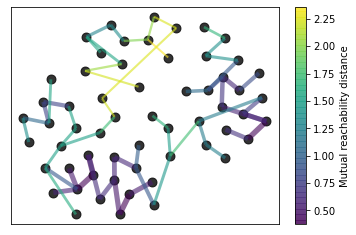

In [240]:
clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis', 
                                      edge_alpha=0.6, 
                                      node_size=80, 
                                      edge_linewidth=2)

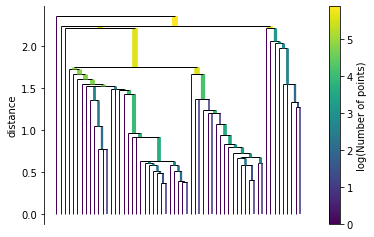

In [241]:
clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)

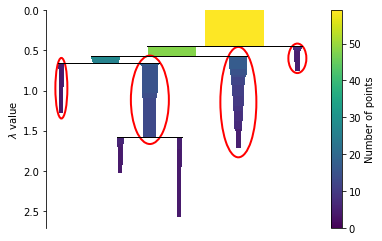

In [242]:
#clusterer.condensed_tree_.plot()
clusterer.condensed_tree_.plot(select_clusters=True)

In [243]:
from sklearn import datasets
from sklearn.manifold import TSNE 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

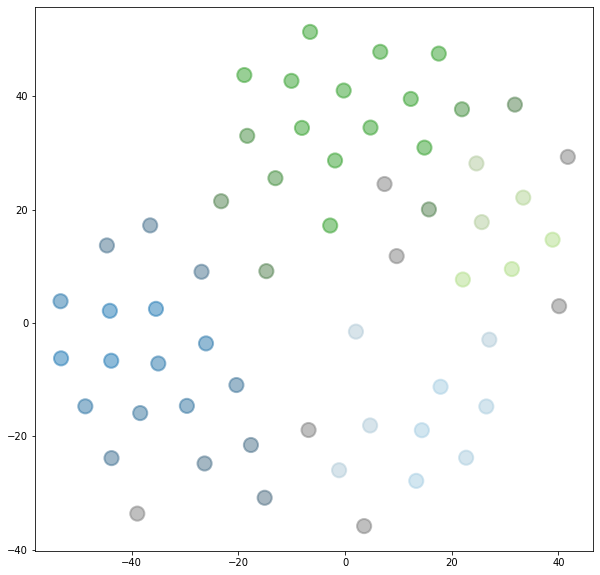

In [244]:
projection = TSNE().fit_transform(dat)
color_palette = sns.color_palette('Paired', 12)
cluster_colors = [color_palette[x] if x >= 0
else (0.5, 0.5, 0.5)
for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
fig,ax = plt.subplots(1,1,figsize=(10,10))
plt.scatter(*projection.T, s=200, linewidth=2, c=cluster_member_colors, alpha=0.5)

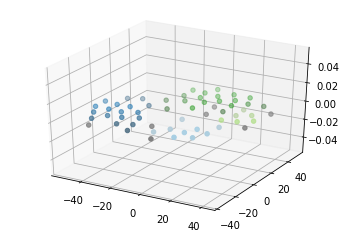

In [245]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(*projection.T,c=cluster_member_colors)

In [246]:
len(countries)

59

In [247]:
len(probdata[0])

59

#### Comparison of country assignment probs

In [257]:
clus_argsort = np.lexsort((countries,clusdata[0]))
scountries = [countries[clus_argsort[i]] for i in range(len(countries))]
probdata_s = probdata.copy()
clusdata_s = clusdata.copy()
for i in range(len(probdata)):
    foo = probdata[i]
    for j in range(len(scountries)):
        probdata_s[i,j] = probdata[i,clus_argsort[j]]
        clusdata_s[i,j] = clusdata[i,clus_argsort[j]]   

In [258]:
# rawdata = np.random.random((10,10))              # prob of correct assignment to chosen cluster
rawdata = np.transpose(probdata_s)
# cindex = np.random.random_integers(0,3,(10,10))  # cluster index 
cindex = np.transpose(clusdata_s)
colors = np.array([[1,1,1],[1,0,0],[0,1,0],[0,0,1],[1,1,0],[0,1,1],[1,0,1]]) # black,red,green,blue,yellow,cyan,magenta
cluscols = np.transpose(colors[cindex[:,:]+1],(2,0,1)) # transpose to allow elementwise multiplication with rawdata with separate r,g,b
coldata = np.transpose((cluscols+3*cluscols*rawdata)/4.,(1,2,0))   # transpose back to have colours as elements of 2D array

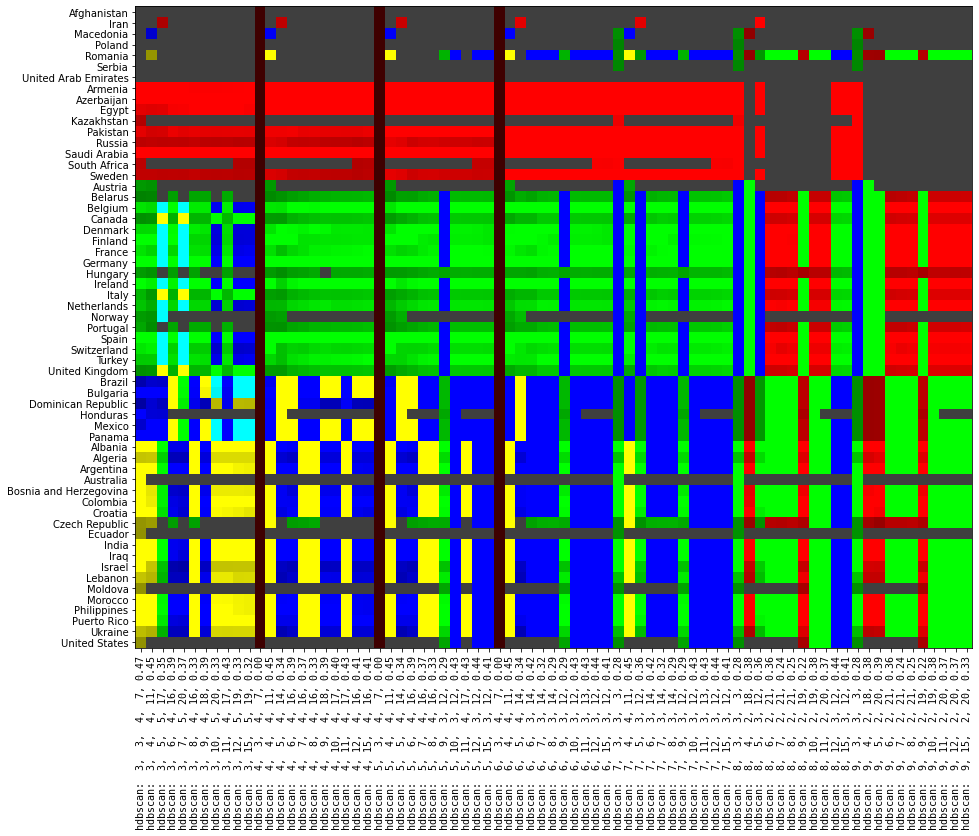

In [259]:
fig,ax = plt.subplots(1,1,figsize=(15,20))
img = ax.imshow(coldata)
ax.set_yticks(range(len(countries)))
ax.set_yticklabels(scountries)
ax.set_xticks(range(len(clusdata_s)))
plt.setp(ax.get_xticklabels(), rotation='vertical', family='monospace')
ax.set_xticklabels(report,rotation='vertical')
# fig.colorbar(img)
plt.show()

## 2nd method using basis:

basis = skfda.representation.basis.BSpline(n_basis=20)
basis_dat_disc = dat_disc.to_basis(basis)
basis_dat_disc.plot()

# Clustering comparisons

Matrix density plot :
Columns : different clusterings.
Rows: the countries.

1.	Choose candidate best clustering: this determines labels of clusters
2.	Order countries by this clustering then alphabetically within cluster
3.	For this first clustering complete column with prob of country assignment being correct. Assign one of 3-6 colours to each cluster label. Shade colour intensity with prob. e.g. colours (red, green ,blue, yellow, magenta, cyan)
4.	For next clustering: firstly determine best matches of cluster index to first clustering. If more clusters than best (or for later steps those already registered), add new clusters to cluster list with new colours. Stop at 6 clusters in registered list. Members of further clusters all receive colour black with grey tone.


## PCA clusterings

In [216]:
# redo all clustering compactly 
# Norman I guess you need to substitute this with dbhscan
datasets = [c for c in clusdata_all]
print(datasets)
res = {}
for d in datasets:
    print('doing ',d,'...')
    mfit = ClusterFit(clusdata_all[d])
    # mfit = ClusterFit(clusdata_all[d],fft='fft') # only 2 clusters for 'deaths'
    mfit.umap_best_cluster(Nclus=3)
    res[d] = mfit

['deaths', 'cases', 'cases_lin2020', 'cases_pwlfit', 'cases_nonlin', 'cases_nonlinr']
doing  deaths ...
found 50 clusterings with size 3 clusters
doing  cases ...
found 5 clusterings with size 3 clusters
doing  cases_lin2020 ...
found 4 clusterings with size 3 clusters
doing  cases_pwlfit ...
found 4 clusterings with size 3 clusters
doing  cases_nonlin ...
found 3 clusterings with size 3 clusters
doing  cases_nonlinr ...
found 3 clusterings with size 3 clusters


In [234]:
clus_argsort = np.lexsort((countries,res['deaths'].clus_labels))
scountries = [countries[clus_argsort[i]] for i in range(len(countries))]
probdata2 = np.zeros((len(res),len(countries)),dtype=np.float)
clusdata2 = np.zeros((len(res),len(countries)),dtype=np.integer)
probdata2s = np.zeros((len(res),len(countries)),dtype=np.float)
clusdata2s = np.zeros((len(res),len(countries)),dtype=np.integer)
for i,rr in enumerate(res):
    foo = res[rr]
    probdata2[i,:] = foo.clus_probs[:]
    clusdata2[i,:] = foo.clus_labels[:]
    for j in range(len(scountries)):
        probdata2s[i,j] = foo.clus_probs[clus_argsort[j]]
        clusdata2s[i,j] = foo.clus_labels[clus_argsort[j]] 

In [235]:
# rawdata = np.random.random((10,10))              # prob of correct assignment to chosen cluster
rawdata = np.transpose(probdata2s)
# cindex = np.random.random_integers(0,3,(10,10))  # cluster index 
cindex = np.transpose(clusdata2s)
colors = np.array([[1,1,1],[1,0,0],[0,1,0],[0,0,1],[1,1,0],[0,1,1],[1,0,1]]) # black,red,green,blue,yellow,cyan,magenta
cluscols = np.transpose(colors[1+cindex[:,:]],(2,0,1)) # transpose to allow elementwise multiplication with rawdata with separate r,g,b
coldata = np.transpose(cluscols*rawdata,(1,2,0))   # transpose back to have colours as elements of 2D array
report2 = ['umap_pca: %16s' % r for r in res]

In [253]:
report2

['umap_pca:           deaths',
 'umap_pca:            cases',
 'umap_pca:    cases_lin2020',
 'umap_pca:     cases_pwlfit',
 'umap_pca:     cases_nonlin',
 'umap_pca:    cases_nonlinr']

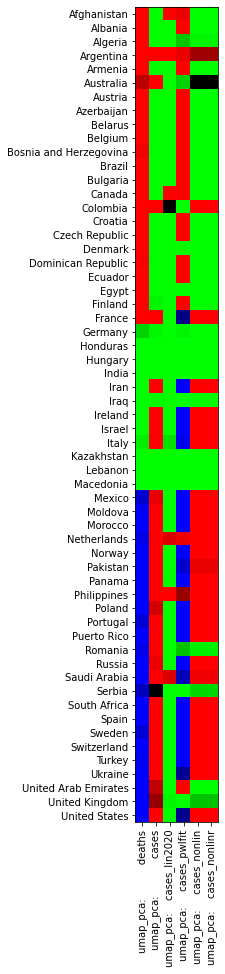

In [236]:
fig,ax = plt.subplots(1,1,figsize=(10,15))
img = ax.imshow(coldata)
ax.set_yticks(range(len(countries)))
ax.set_yticklabels(countries)
ax.set_xticks(range(len(res)))
ax.set_xticklabels(report2,rotation='vertical')
# fig.colorbar(img)
plt.show()

## HDBSCAN and PCA clusterings together

In [260]:
clusdata12 = np.concatenate((clusdata,clusdata2))
probdata12 = np.concatenate((probdata,probdata2))
report12 = report + report2
clus_argsort = np.lexsort((countries,clusdata12[0]))
scountries = [countries[clus_argsort[i]] for i in range(len(countries))]
probdata_s = probdata12.copy()
clusdata_s = clusdata12.copy()
for i in range(len(probdata12)):
    foo = probdata12[i]
    for j in range(len(scountries)):
        probdata_s[i,j] = probdata12[i,clus_argsort[j]]
        clusdata_s[i,j] = clusdata12[i,clus_argsort[j]]   

In [261]:
# rawdata = np.random.random((10,10))              # prob of correct assignment to chosen cluster
rawdata = np.transpose(probdata_s)
# cindex = np.random.random_integers(0,3,(10,10))  # cluster index 
cindex = np.transpose(clusdata_s)
colors = np.array([[1,1,1],[1,0,0],[0,1,0],[0,0,1],[1,1,0],[0,1,1],[1,0,1]]) # black,red,green,blue,yellow,cyan,magenta
cluscols = np.transpose(colors[cindex[:,:]+1],(2,0,1)) # transpose to allow elementwise multiplication with rawdata with separate r,g,b
coldata = np.transpose((cluscols+3*cluscols*rawdata)/4.,(1,2,0))   # transpose back to have colours as elements of 2D array

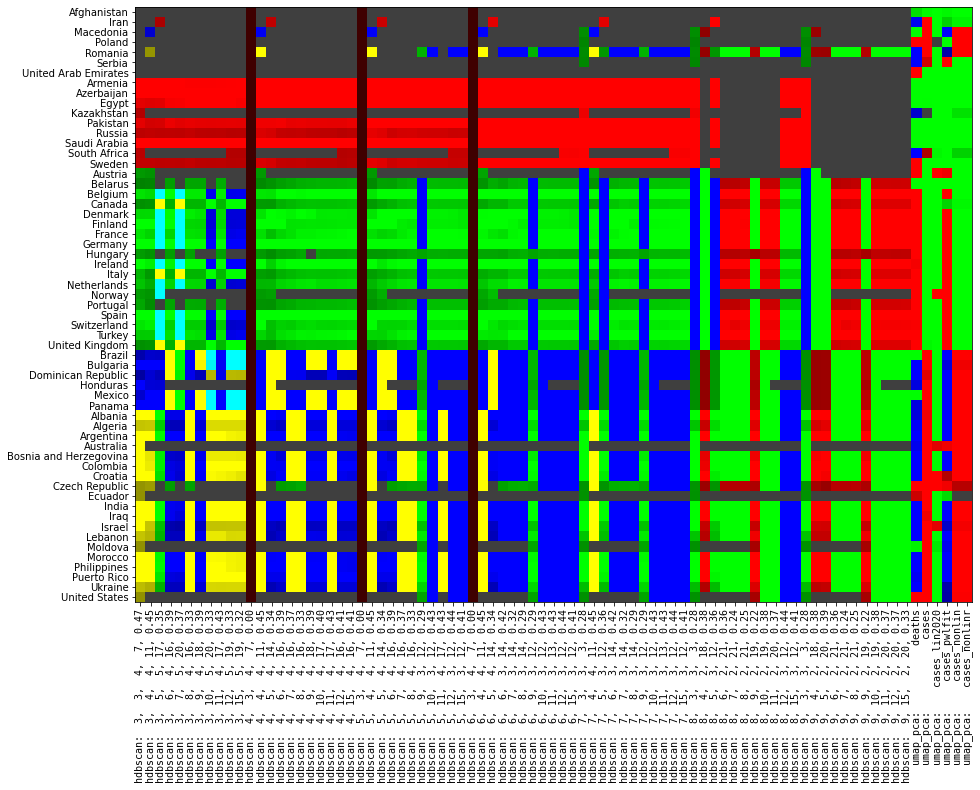

In [262]:
fig,ax = plt.subplots(1,1,figsize=(15,20))
img = ax.imshow(coldata)
ax.set_yticks(range(len(countries)))
ax.set_yticklabels(scountries)
ax.set_xticks(range(len(clusdata_s)))
plt.setp(ax.get_xticklabels(), rotation='vertical', family='monospace')
ax.set_xticklabels(report12,rotation='vertical')
# fig.colorbar(img)
plt.show()

Still working on mapping between clusters, so that recolor columns to best match 

In [ ]:
def corcl(a,b):
    if len(set(a)) > 0 or len(set(b)) > 0:
        return len(set(a).intersection(set(b)))/float(len(set(a).union(set(b))))
    else:
        return 1 
    
def matchset(a,x):
    rtn = [i for i in range(len(a)) if a[i] == x]
    return rtn

def match1(a,x):
    rtn = [1 if a[i] == x else 0 for i in range(len(a)) ]
    return rtn
    
def imxcor(clusters,nset,n,nclus,nclusmax=6): 
    """ finds cluster index in previous datasets d best correlated to cluster n in dataset dd
        nclus is current number of already aligned clusters
        nclusmax is max allowed number of clusters
    """
    cx = []
    cc = clusters[nset]
    for j in range(0,nset):
        c = mapclusters[j]
        klen = min(nclusmax,len(cc))
        for k in range(nclus): # find best matching previous cluster
            cx.append(np.sum(match1(cc,n)*match1(c,k)))
    return argmax(cx),max(cx)